---
---

<img src="logo_univ.png" width=250px align="right"></span>

# <span style="background-color: "> **_Modélisation des prix dans      le secteur de l'immobilier à Lyon_** </span>

### **_Projet introduction au Machine Learning en Python | Partie 2 : Pre-Processing_**

Jeudi 2 Juin 2022

##### <div style="text-align:right;">Projet réalisé par : Gaoussou Diakité, Abir Khan, Anis Louissi, Camil Zahi</div>
<div style="text-align:right;">Sous la direction de : Guillaume Clement & Paul Thavenot </div>

---
---

In [5]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

---
<h3><center> Les données </center></h3>

In [6]:
# Lecture de la base de données
df = pd.read_csv("AIRBNB LYON net.csv")

In [7]:
# Affichage du dataframe
df.sample(n=10, random_state=14)

,Prix par nuit,Localisation,Latitude,Longitude,Type,Nombre d'invités,Nombre de chambres,Nombre de lits,Badge hote de qualité,Note moyenne sur 5,...,Chauffage,Climatisation,Ménage,Jardin,Terrasse,Parking,Ascenseur,Cuisine,Micro-ondes,Four
366,270.96,7,45.75366,4.84271,Entire home/apt,8,3,5,Non,-1.00,...,Oui,Non,Non,Non,Non,Non,Oui,Oui,Non,Non
3476,135.48,9,45.80087,4.83374,Entire home/apt,4,1,2,Non,-1.00,...,Oui,Non,Non,Non,Non,Non,Oui,Oui,Non,Non
3744,37.03,6,45.76454,4.86883,Private room,2,1,1,Oui,4.96,...,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Oui
279,76.77,7,45.74913,4.83858,Private room,2,1,1,Non,-1.00,...,Oui,Non,Non,Non,Non,Non,Oui,Oui,Non,Non
529,47.87,2,45.75676,4.83009,Entire home/apt,2,1,1,Non,4.53,...,Oui,Non,Non,Non,Non,Non,Oui,Oui,Non,Non
4237,43.35,8,45.73717,4.86098,Entire home/apt,2,1,1,Non,4.40,...,Oui,Non,Oui,Non,Non,Oui,Non,Oui,Non,Non
1355,316.12,3,45.75266,4.88610,Entire home/apt,4,2,2,Non,-1.00,...,Oui,Non,Non,Non,Non,Oui,Oui,Oui,Non,Non
2930,40.64,8,45.73960,4.86043,Entire home/apt,4,-1,2,Non,4.56,...,Oui,Non,Non,Non,Non,Non,Non,Oui,Oui,Oui
385,45.16,7,45.75308,4.84332,Private room,2,1,1,Non,5.00,...,Oui,Non,Non,Non,Non,Non,Non,Oui,Non,Non
2496,54.19,1,45.77119,4.82631,Private room,1,1,1,Non,5.00,...,Oui,Non,Non,Non,Non,Non,Oui,Non,Non,Non


In [8]:
df.shape

(6736, 24)

---
<h3><center> Encodage </center></h3>

In [9]:
# Types de variables
df.dtypes

Prix par nuit              float64
Localisation                 int64
Latitude                   float64
Longitude                  float64
Type                        object
Nombre d'invités             int64
Nombre de chambres           int64
Nombre de lits               int64
Badge hote de qualité       object
Note moyenne sur 5         float64
Nombre d'avis                int64
Type de salle de bain       object
Nombre de salle de bain      int64
Wifi                        object
Chauffage                   object
Climatisation               object
Ménage                      object
Jardin                      object
Terrasse                    object
Parking                     object
Ascenseur                   object
Cuisine                     object
Micro-ondes                 object
Four                        object
dtype: object

In [10]:
# Affichage du nombre de modalités par variable
var_cate = [col for col in df.columns if df[col].dtype=='O']
for col in var_cate:
    print(f"La variable {col} contient {df[col].nunique()} modalités") 

La variable Type contient 4 modalités
La variable Badge hote de qualité contient 2 modalités
La variable Type de salle de bain contient 2 modalités
La variable Wifi contient 2 modalités
La variable Chauffage contient 2 modalités
La variable Climatisation contient 2 modalités
La variable Ménage contient 2 modalités
La variable Jardin contient 2 modalités
La variable Terrasse contient 2 modalités
La variable Parking contient 2 modalités
La variable Ascenseur contient 2 modalités
La variable Cuisine contient 2 modalités
La variable Micro-ondes contient 2 modalités
La variable Four contient 2 modalités


In [11]:
# Importation des librairies
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [12]:
# One-Hot-Encoding
df_one_hot_encod= pd.get_dummies(data=df, columns = ['Type',"Badge hote de qualité", 'Type de salle de bain', 
                                              'Wifi', 'Chauffage', 'Climatisation', "Ménage", "Jardin", 
                                              "Terrasse", 'Parking', 'Ascenseur', 'Cuisine', 'Micro-ondes',
                                              "Four"], drop_first=True)
df_one_hot_encod = df_one_hot_encod.drop(["Latitude","Longitude"],axis=1)
df_one_hot_encod.columns

Index(['Prix par nuit', 'Localisation', 'Nombre d'invités',
       'Nombre de chambres', 'Nombre de lits', 'Note moyenne sur 5',
       'Nombre d'avis', 'Nombre de salle de bain', 'Type_Hotel room',
       'Type_Private room', 'Type_Shared room', 'Badge hote de qualité_Oui',
       'Type de salle de bain_Partagée', 'Wifi_Oui', 'Chauffage_Oui',
       'Climatisation_Oui', 'Ménage_Oui', 'Jardin_Oui', 'Terrasse_Oui',
       'Parking_Oui', 'Ascenseur_Oui', 'Cuisine_Oui', 'Micro-ondes_Oui',
       'Four_Oui'],
      dtype='object')

In [13]:
# Affichage du dataframe
df_one_hot_encod.sample(n=10, random_state=404)

,Prix par nuit,Localisation,Nombre d'invités,Nombre de chambres,Nombre de lits,Note moyenne sur 5,Nombre d'avis,Nombre de salle de bain,Type_Hotel room,Type_Private room,...,Chauffage_Oui,Climatisation_Oui,Ménage_Oui,Jardin_Oui,Terrasse_Oui,Parking_Oui,Ascenseur_Oui,Cuisine_Oui,Micro-ondes_Oui,Four_Oui
252,270.96,2,6,3,3,-1.00,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
4713,47.87,7,2,1,1,5.00,2,1,0,0,...,1,0,0,0,0,0,0,1,0,1
3889,72.26,3,6,3,4,5.00,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4365,37.93,8,3,1,1,4.61,38,1,0,0,...,1,0,0,0,0,0,1,1,1,1
3473,63.22,3,2,1,1,4.94,16,1,0,1,...,1,1,0,0,1,0,1,0,1,1
5652,186.96,2,2,3,2,-1.00,0,2,0,0,...,1,0,1,0,1,0,1,1,1,1
1990,29.81,7,1,1,1,4.92,13,1,0,1,...,1,0,0,0,1,0,1,1,0,1
143,98.45,2,4,1,2,4.20,5,1,0,0,...,1,0,0,0,0,0,1,1,1,1
5777,45.16,7,2,1,1,5.00,6,1,0,0,...,1,0,0,0,1,0,1,1,0,1
5633,80.38,9,2,-1,1,4.64,11,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [14]:
# Export du dataframe au format csv
df_one_hot_encod.to_csv('AIRBNB LYON encodé.csv', index=False)

---
<h3><center> Linéarisation </center></h3>

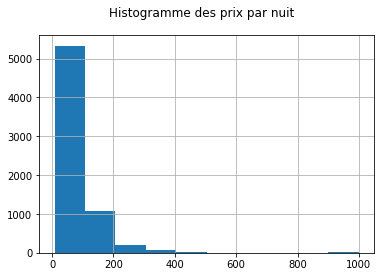

In [15]:
# Histogramme du prix par nuit
df_one_hot_encod['Prix par nuit'].hist()
plt.suptitle('Histogramme des prix par nuit')
plt.show()

**Remarque sur le Prix par nuit :**
La target est assymétrique, très concentrée sur la gauche et étalée sur la droite par rapport à l'axe des abscisses, il faut donc la tranformer en log.

In [16]:
# Linéarisation des prix
df_one_hot_encod['log_Prix_nuit'] = np.log(df_one_hot_encod['Prix par nuit'])

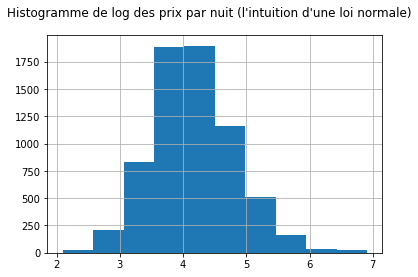

In [17]:
# Histogramme de log des prix par nuit
df_one_hot_encod['log_Prix_nuit'].hist()
plt.suptitle("Histogramme de log des prix par nuit (l'intuition d'une loi normale)")
plt.show()

In [18]:
# Suppression de la colonne prix par nuit
df_one_hot_encod = df_one_hot_encod.drop(["Prix par nuit"], axis = 1)

In [19]:
# Affichage du dataframe
df_one_hot_encod.sample(n=10,random_state=98)

,Localisation,Nombre d'invités,Nombre de chambres,Nombre de lits,Note moyenne sur 5,Nombre d'avis,Nombre de salle de bain,Type_Hotel room,Type_Private room,Type_Shared room,...,Climatisation_Oui,Ménage_Oui,Jardin_Oui,Terrasse_Oui,Parking_Oui,Ascenseur_Oui,Cuisine_Oui,Micro-ondes_Oui,Four_Oui,log_Prix_nuit
4025,7,2,1,1,4.88,82,1,0,0,0,...,0,0,1,0,1,0,1,1,1,4.174849
2716,2,4,2,2,5.00,1,2,0,0,0,...,0,0,0,0,0,0,1,1,1,5.415656
1398,7,4,1,2,2.50,3,1,0,0,0,...,0,0,0,0,0,0,1,0,0,3.958716
6286,7,6,2,3,5.00,2,2,0,0,0,...,0,1,0,0,0,0,1,0,1,5.155659
2466,3,2,1,1,4.97,31,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.509155
14,2,4,2,3,4.38,10,1,0,0,0,...,0,1,0,0,1,1,1,1,1,5.327536
1532,7,10,2,4,4.00,6,1,0,0,0,...,0,0,0,1,0,1,1,1,1,5.814399
5836,1,2,1,1,4.80,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,4.228875
861,2,6,3,3,4.73,22,1,0,0,0,...,0,0,0,0,0,0,1,0,0,4.552191
3944,3,2,1,1,4.38,21,1,0,0,0,...,0,0,0,1,0,0,1,1,0,3.682358


---
<h3><center> Selection des variables </center></h3>

In [20]:
# Corrélation des variables avec le log_Prix
corrmat = df_one_hot_encod.corr()
corrs = corrmat['log_Prix_nuit'].abs().sort_values()
print(corrs)

Jardin_Oui                        0.000466
Ménage_Oui                        0.004783
Terrasse_Oui                      0.009016
Badge hote de qualité_Oui         0.013541
Chauffage_Oui                     0.014134
Parking_Oui                       0.021075
Ascenseur_Oui                     0.023490
Wifi_Oui                          0.028194
Type_Hotel room                   0.038488
Micro-ondes_Oui                   0.045013
Cuisine_Oui                       0.053416
Nombre d'avis                     0.070562
Four_Oui                          0.074277
Climatisation_Oui                 0.075392
Type_Shared room                  0.103268
Localisation                      0.135567
Nombre de salle de bain           0.175696
Note moyenne sur 5                0.181225
Type de salle de bain_Partagée    0.356624
Nombre de chambres                0.368466
Type_Private room                 0.393366
Nombre de lits                    0.417758
Nombre d'invités                  0.537584
log_Prix_nu

<AxesSubplot:>

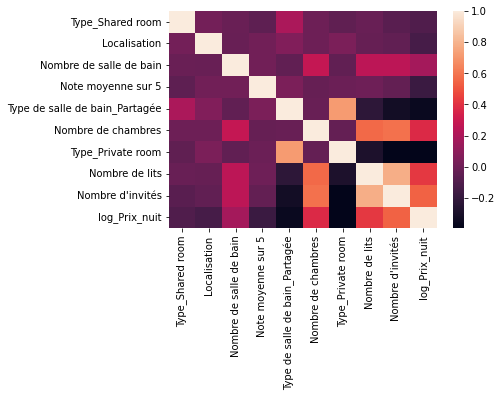

In [21]:
# Matrice de corrélation
strong_corrs = corrs[corrs > 0.1]
corrmat = df_one_hot_encod[strong_corrs.index].corr()
sns.heatmap(corrmat)

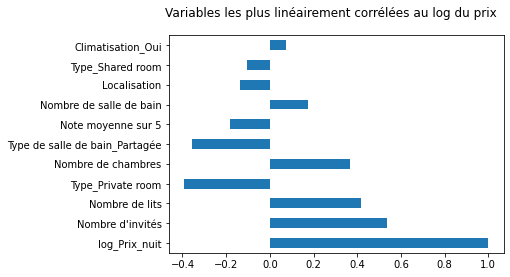

In [24]:
# Les 10 variables les plus corrélés linéairement au prix 
corr_matrix = df_one_hot_encod.corr()
var_corr = corr_matrix['log_Prix_nuit'].reindex(corr_matrix['log_Prix_nuit'].abs().sort_values(ascending = False).index)[0:11]
var_corr.plot(kind = 'barh')
plt.suptitle('Variables les plus linéairement corrélées au log du prix')
plt.show()

In [18]:
df_one_hot_encod.to_csv('AIRBNB LYON encodé2.csv', index=False)

In [19]:
# Standardisation des colonnes
y = df_one_hot_encod['log_Prix_nuit'].copy()
X = df_one_hot_encod.drop('log_Prix_nuit', axis=1).copy()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Localisation,Nombre d'invités,Nombre de chambres,Nombre de lits,Note moyenne sur 5,Nombre d'avis,Nombre de salle de bain,Type_Hotel room,Type_Private room,Type_Shared room,...,Chauffage_Oui,Climatisation_Oui,Ménage_Oui,Jardin_Oui,Terrasse_Oui,Parking_Oui,Ascenseur_Oui,Cuisine_Oui,Micro-ondes_Oui,Four_Oui
0,0.220335,1.838142,1.933158,2.227614,0.567711,1.352099,3.490797,-0.062248,-0.570036,-0.089054,...,0.331516,-0.327363,-0.307527,-0.251259,-0.375395,-0.463452,-0.840860,0.254251,-0.785676,-0.723152
1,0.617174,0.563712,-0.050807,-0.618954,0.604388,0.100535,-0.162716,-0.062248,-0.570036,-0.089054,...,0.331516,3.054716,-0.307527,-0.251259,2.663861,2.157719,1.189259,0.254251,1.272789,1.382836
2,-1.367019,1.838142,1.933158,2.227614,0.526960,2.961252,-0.162716,-0.062248,-0.570036,-0.089054,...,0.331516,-0.327363,-0.307527,-0.251259,-0.375395,-0.463452,1.189259,0.254251,1.272789,1.382836
3,-0.573342,1.838142,0.941175,0.329902,0.571787,0.100535,3.490797,-0.062248,-0.570036,-0.089054,...,0.331516,-0.327363,-0.307527,3.979950,2.663861,2.157719,1.189259,0.254251,1.272789,1.382836
4,-1.367019,-0.710718,-0.050807,-0.618954,0.645140,2.961252,-0.162716,-0.062248,-0.570036,-0.089054,...,0.331516,-0.327363,-0.307527,-0.251259,-0.375395,-0.463452,1.189259,0.254251,-0.785676,1.382836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,1.410851,-1.347933,-0.050807,-0.618954,-1.751056,-0.614644,-0.162716,-0.062248,-0.570036,-0.089054,...,0.331516,-0.327363,3.251751,3.979950,-0.375395,2.157719,-0.840860,-3.933121,1.272789,-0.723152
6732,-0.970181,-0.710718,-2.034771,-0.618954,-1.751056,-0.614644,-0.162716,-0.062248,-0.570036,-0.089054,...,0.331516,-0.327363,-0.307527,-0.251259,-0.375395,-0.463452,1.189259,0.254251,1.272789,-0.723152
6733,-0.573342,0.563712,-0.050807,-0.618954,-1.751056,-0.614644,-0.162716,-0.062248,-0.570036,-0.089054,...,-3.016447,-0.327363,-0.307527,-0.251259,-0.375395,-0.463452,-0.840860,0.254251,-0.785676,-0.723152
6734,-0.970181,0.563712,-0.050807,-0.618954,-1.751056,-0.614644,-0.162716,-0.062248,-0.570036,-0.089054,...,0.331516,3.054716,-0.307527,-0.251259,-0.375395,2.157719,-0.840860,0.254251,1.272789,1.382836


In [20]:
# Export du dataframe au format csv
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)